# Welzl's Algorithm

Recently I need to find a minimal circle containing all given circles. After a little research, I found [Welzl's algorithm](https://en.wikipedia.org/wiki/Smallest-circle_problem). It should be noted that this algorithm is for minimal circle containing given points, but my guess is that the algorithm should be usable.

The tricky part is the condition to terminate the recursive. Original algorithm gives $|R| = 3$ as one of the termination condition, which is because that 3 points (on the boundary) can determine a circle. For my problem, is this value still $3$? After a quick thought, I guess it's $3$ too.

Let's re-write the algorithm for the case with circles as input.

> - **input**: Finite sets $P$ and $R$ of circles in the plane $|R| ≤ 3$.
> - **output**: Minimal disk enclosing $P$ with $R$ on the boundary.
>
> - if $P$ is empty or $|R| = 3$ then
>   - return $\text{trivial}(R)$
> - choose $p$ in $P$ (randomly and uniformly)
>   - $D := \text{welzl}(P − \{p\}, R)$
> - if $p$ is in $D$ then
>   - return $D$
> - else
>   - return $\text{welzl}(P − \{p\}, R \cup \{p\})$

## Random circles generation

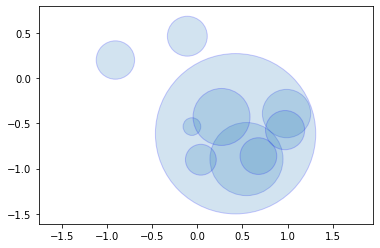

In [89]:
import random
from typing import Tuple, List
from matplotlib import pyplot as plt
import matplotlib.patches
import matplotlib.collections

Point = Tuple[float, float]

class Circle:
    def __init__(self, center: Point = (0.0, 0.0), radius: float = 0.0) -> None:
        self.center = center
        self.radius = radius
    
    def __str__(self):
        return f'({self.center[0]}, {self.center[1]}, {self.radius})'

# https://stackoverflow.com/questions/9081553/python-scatter-plot-size-and-style-of-the-marker/24567352#24567352
# https://stackoverflow.com/a/24568380/4635234
def draw_circles(circles: List[Circle], **kwargs):
    circle_args = dict()
    if 'fill' in kwargs: circle_args['fill'] = kwargs.pop('fill')
    if 'color' in kwargs: circle_args['color'] = kwargs.pop('color')
    patches = [matplotlib.patches.Circle(circle.center, circle.radius, **circle_args) for circle in circles]
    collection = matplotlib.collections.PatchCollection(patches, **kwargs)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    ax.axis('equal')

def generate_circles(n: int, pos_range: Tuple[float, float], radius_range: Tuple[float, float]) -> List[Circle]:
    return [Circle((random.random() * (pos_range[1] - pos_range[0]) + pos_range[0], 
            random.random() * (pos_range[1] - pos_range[0]) + pos_range[0]), 
            random.random() * (radius_range[1] - radius_range[0]) + radius_range[0]) 
            for _ in range(n)]

draw_circles(generate_circles(10, (-1, 1), (0, 1)), alpha=0.2, color='r', edgecolor='b')


## Finding minimal circle in trival cases

With one circle on the boundary, the result should be the circle itself.

With two circles on the boundary, the result circle should have a diameter across the center of the two circles.
$$
\begin{aligned}
& D = r_1 + r_2 + |\overrightarrow{O_1O_2}| \\
& \lambda = \frac{\frac{D}{2} - r1}{|\overrightarrow{O_1O_2}|} = \frac{1}{2}\left(1+\frac{r_2-r_1}{|\overrightarrow{O_1O_2}|}\right) \\
& \overrightarrow{O_1O} = \lambda \cdot \overrightarrow{O_1O_2}
\end{aligned}
$$

With three circles on the boundary, the result circle (with radius $r$ and centered at $(x, y)$) should have:
$$
\begin{aligned}
(x - x_1)^2 + (y - y_1)^2 &= (r - r_1)^2 \\
(x - x_2)^2 + (y - y_2)^2 &= (r - r_2)^2 \\
(x - x_3)^2 + (y - y_3)^2 &= (r - r_3)^2
\end{aligned}
$$

Subtracting the 2nd and the 3rd equations from the 1st:
$$
\begin{aligned}
& -2(x_2 - x_1)x + (x_2^2 - x_1^2) - 2(y_2 - y_1)y + (y_2^2 - y_1^2) = -2(r_2 - r_1)r + (r_2^2 - r_1^2) \\
& -2(x_3 - x_1)x + (x_3^2 - x_1^2) - 2(y_3 - y_1)y + (y_3^2 - y_1^2) = -2(r_3 - r_1)r + (r_3^2 - r_1^2)
\end{aligned}
$$

i.e.
$$
\begin{aligned}
& (x_1 - x_2)x + (y_1 - y_2)y = (r_1 - r_2)r + \frac{1}{2}\left((r_2^2 - r_1^2) - (x_2^2 - x_1^2) - (y_2^2 - y_1^2)\right)  \\
& (x_1 - x_3)x + (y_1 - y_3)y = (r_1 - r_3)r + \frac{1}{2}\left((r_3^2 - r_1^2) - (x_3^2 - x_1^2) - (y_3^2 - y_1^2)\right)
\end{aligned}
$$
or
$$
\begin{aligned}
& A_1x + B_1y = C_1r + D_1 \\
& A_2x + B_2y = C_2r + D_2
\end{aligned}
$$

This is a linear equation, we can solve that
$$
\begin{aligned}
x &= \frac{(B_1C_2 - B_2C_1)r + (B_1D_2 - B_2D_1)}{A_2B_1 - A_1B_2} = M_1r + N_1 \\
y &= \frac{(A_1C_2 - A_2C_1)r + (A_1D_2 - A_2D_1)}{A_1B_2 - A_2B_1} = M_2r + N_2 \\
\end{aligned}
$$

Therefore
$$
(M_1^2 + M_2^2 - 1)r^2 + 2(M_1N_1 + M_2N_2 - M_1x_1 - M_2y_1 + r1)r + N_1^2 -2N_1x_1 + x_1^2 + N_2^2 -2N_2y1 + y_1^2 - r_1^2 = 0
$$

## 

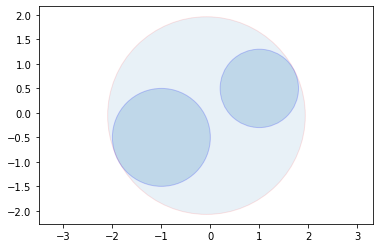

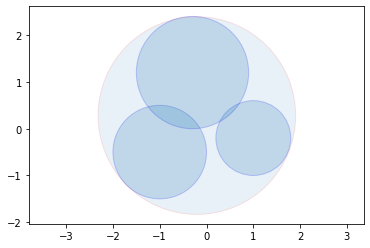

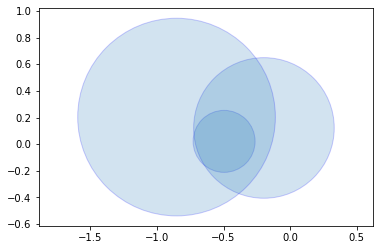

In [139]:
import math

def dist(a: Point, b: Point) -> float:
    return math.sqrt((a[0] - b[0]) * (a[0] - b[0]) + (a[1] - b[1]) * (a[1] - b[1]))

def interp(a: Point, b: Point, l: float) -> Point:
    return (l * b[0] + (1 - l) * a[0], l * b[1] + (1 - l) * a[1])

def inside(a: Circle, b: Circle) -> bool:
    return dist(a.center, b.center) + a.radius <= b.radius + 1e-5

def trivial3(R: List[Circle]) -> Circle:
    x1, y1, r1 = R[0].center[0], R[0].center[1], R[0].radius
    x2, y2, r2 = R[1].center[0], R[1].center[1], R[1].radius
    x3, y3, r3 = R[2].center[0], R[2].center[1], R[2].radius

    A1 = x1 - x2
    B1 = y1 - y2
    C1 = r1 - r2
    D1 = (r2*r2 - r1*r1 + x1*x1 - x2*x2 + y1*y1 - y2*y2) / 2.0
    A2 = x1 - x3
    B2 = y1 - y3
    C2 = r1 - r3
    D2 = (r3*r3 - r1*r1 + x1*x1 - x3*x3 + y1*y1 - y3*y3) / 2.0
    M1 = (B1*C2 - B2*C1) / (A2*B1 - A1*B2)
    N1 = (B1*D2 - B2*D1) / (A2*B1 - A1*B2)
    M2 = (A1*C2 - A2*C1) / (A1*B2 - A2*B1)
    N2 = (A1*D2 - A2*D1) / (A1*B2 - A2*B1)
    A = M1*M1 + M2*M2 - 1
    B = 2*(M1*N1 + M2*N2 - M1*x1 - M2*y1 + r1)
    C = N1*N1 - 2*N1*x1 + x1*x1 + N2*N2 - 2*N2*y1 + y1*y1 - r1*r1
    delta = B*B - 4*A*C
    delta = delta if delta > 0 else 0.0
    
    ra = (-B + math.sqrt(delta)) / (2.0 * A)
    xa = M1*ra + N1
    ya = M2*ra + N2
    ca = Circle((xa, ya), ra)
    rb = (-B - math.sqrt(delta)) / (2.0 * A)
    xb = M1*rb + N1
    yb = M2*rb + N2
    cb = Circle((xb, yb), rb)

    ok_a = inside(R[0], ca) and inside(R[1], ca) and inside(R[2], ca)
    ok_b = inside(R[0], cb) and inside(R[1], cb) and inside(R[2], cb)
    if ok_a and ok_b:
        return ca if ca.radius < cb.radius else cb
    elif ok_a:
        return ca
    elif ok_b:
        return cb
    else:
#         raise RuntimeError(f'''No solution found!
# ca:{ca}
# R[0] in?:{ca.radius - (dist(R[0].center, ca.center) + R[0].radius)},
# R[1] in?:{ca.radius - (dist(R[1].center, ca.center) + R[1].radius)},
# R[2] in?:{ca.radius - (dist(R[2].center, ca.center) + R[2].radius)}
# cb:{cb}
# R[0] in?:{cb.radius - (dist(R[0].center, cb.center) + R[0].radius)},
# R[1] in?:{cb.radius - (dist(R[1].center, cb.center) + R[1].radius)},
# R[2] in?:{cb.radius - (dist(R[2].center, cb.center) + R[2].radius)}
# ''')
        return Circle()

def trivial(R: List[Circle]):
    if len(R) > 3:
        raise RuntimeError('len(R) <= 3')
    elif len(R) == 0:
        return Circle()
    elif len(R) == 1:
        return R[0]
    elif len(R) == 2:
        distance = dist(R[0].center, R[1].center)
        diameter = R[0].radius + R[1].radius + distance
        l = (1.0 + (R[1].radius - R[0].radius) / distance) / 2.0
        center = interp(R[0].center, R[1].center, l)
        return Circle(center, diameter / 2.0)
    else:
        return trivial3(R)

two_circles = [Circle((-1, -0.5), 1), Circle((1, 0.5), 0.8)]
center_two = trivial(two_circles)
three_circles = [Circle((-1, -0.5), 1), Circle((1, -0.2), 0.8), Circle((-0.3, 1.2), 1.2)]
center_three = trivial(three_circles)
random_three = generate_circles(3, (-1, 1), (0, 1))
center_random_three = trivial(random_three)

plt.figure()
draw_circles(two_circles, alpha=0.2, color='r', edgecolor='b')
draw_circles([center_two], alpha=0.1, color='r', edgecolor='r')
plt.figure()
draw_circles(three_circles, alpha=0.2, color='r', edgecolor='b')
draw_circles([center_three], alpha=0.1, color='r', edgecolor='r')
plt.figure()
draw_circles(random_three, alpha=0.2, color='r', edgecolor='b')
draw_circles([center_random_three], alpha=0.1, color='r', edgecolor='r')

## Finding minimal circle for all cases

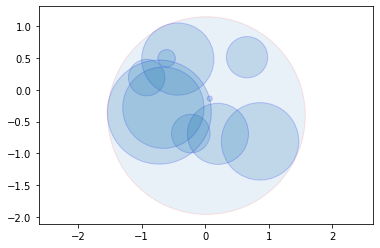

In [186]:
def welzl(P: List[Circle], R: List[Circle]) -> Circle:
    if len(P) == 0 or len(R) == 3:
        return trivial(R)
    
    idx = random.randrange(len(P))
    p = P[idx]
    P1 = P.copy()
    del P1[idx]

    D = welzl(P1, R)
    if inside(p, D):
        return D
    else:
        R1 = R.copy()
        R1.append(p)
        return welzl(P1, R1)

circles = generate_circles(10, (-1, 1), (0, 1))
center = welzl(circles, [])

draw_circles(circles, alpha=0.2, color='r', edgecolor='b')
draw_circles([center], alpha=0.1, color='r', edgecolor='r')